In [ ]:
library(monocle)
library(readxl)
library(magrittr)
library(dplyr)

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: ggplot2

Loading required package: VGAM

Loading required package: stats4

Loading re

## Code for Monocle analysis

In [2]:
count <- read.csv('GSE104276_all_pfc_2394_UMI_TPM_NOERCC.xls',sep = '\t',header = T)
meta <- read_excel('GSE104276_readme_sample_barcode.xlsx', sheet='SampleInfo')

meta <- as.data.frame(meta)
row.names(meta) <- meta[,1]
meta[,1] <- NULL
count <- count[, row.names(meta)]

New names:
• `` -> `...1`


In [6]:
head(meta)

,cell_types,week,Gene_num,Pre_Map_Reads,Aligned_Reads,MappingRate,pfc
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GW08_PFC1_sc1,Neurons,GW08,4405,5941167,4622105,0.778,PFC1
GW08_PFC1_sc11,Stem cells,GW08,2058,544878,418086,0.767,PFC1
GW08_PFC1_sc12,Neurons,GW08,2967,778157,604185,0.776,PFC1
GW08_PFC1_sc13,Neurons,GW08,2348,792592,604056,0.762,PFC1
GW08_PFC1_sc14,Neurons,GW08,2410,983852,790058,0.803,PFC1
GW08_PFC1_sc15,Neurons,GW08,2508,901838,707992,0.785,PFC1


In [ ]:
pd <- new("AnnotatedDataFrame", data = meta)
cds_pre <- newCellDataSet(as.matrix(count),
                    phenoData = pd,
                    featureData = new("AnnotatedDataFrame", data = data.frame(gene_short_name = row.names(count), row.names = row.names(count))),
                    expressionFamily = negbinomial.size())

cds_pre <- estimateSizeFactors(cds_pre)
cds_pre <- estimateDispersions(cds_pre)

In [22]:
cds_pre

CellDataSet (storageMode: environment)
assayData: 24153 features, 2309 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GW08_PFC1_sc1 GW08_PFC1_sc11 ... GW26_PFC1_R4_sc8 (2309
    total)
  varLabels: cell_types week ... Size_Factor (8 total)
  varMetadata: labelDescription
featureData
  featureNames: A1BG A1BG-AS1 ... ZZZ3 (24153 total)
  fvarLabels: gene_short_name
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [ ]:
gene_Disp = dispersionTable(cds_pre)
gene_sle = gene_Disp %>% 
  dplyr::filter(mean_expression >= 0.1,
                dispersion_empirical >= dispersion_fit) %>% 
  pull(gene_id) %>% unique()
cds <- setOrderingFilter(cds_pre, gene_sle)
cds <- reduceDimension(cds, method = 'DDRTree')

In [ ]:
# cds <- orderCells(cds,root_state = '2')
cds <- orderCells(cds)

Warning message in dfs(graph = graph, root = root, mode = mode, unreachable = unreachable, :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in dfs(graph = graph, root = root, mode = mode, unreachable = unreachable, :
“Argument `neimode' is deprecated; use `mode' instead”


In [7]:
table(cds$State, cds$week)

   
    GW08 GW09 GW10 GW12 GW13 GW16 GW19 GW23 GW26
  1   13   51   70   60   19  285   94  210  279
  2    8   37  113   24    4  474   19   13   33
  3    0    0    1    0    0    7    5   46  166
  4    2    0    2    0    0    9    0   33  210
  5    0    0    0    1    1    1    2    6   11

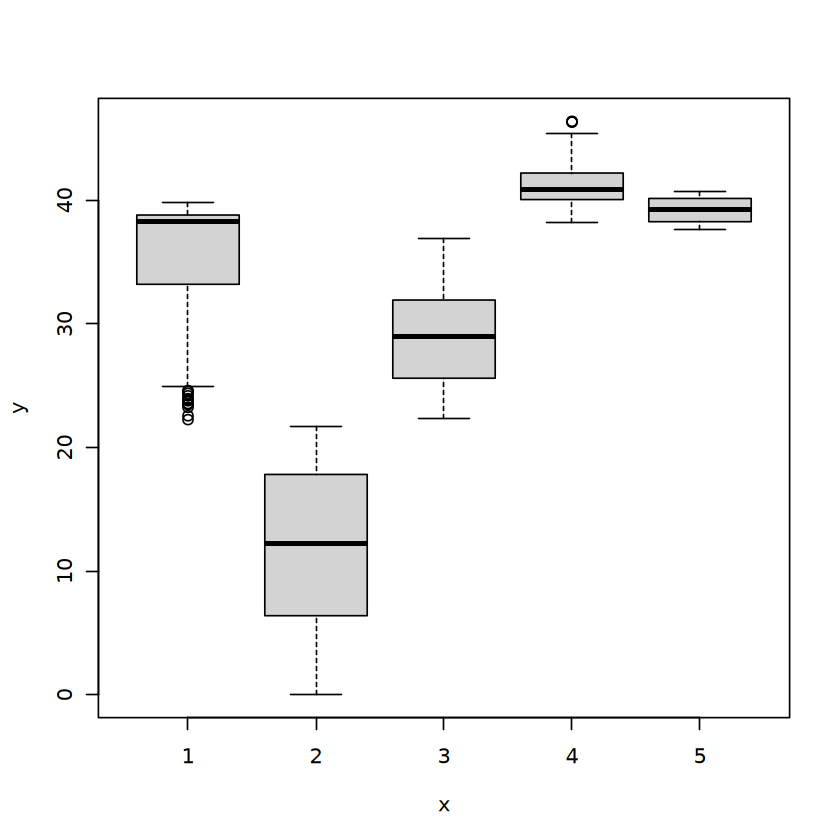

In [8]:
plot(cds$State, cds$Pseudotime)


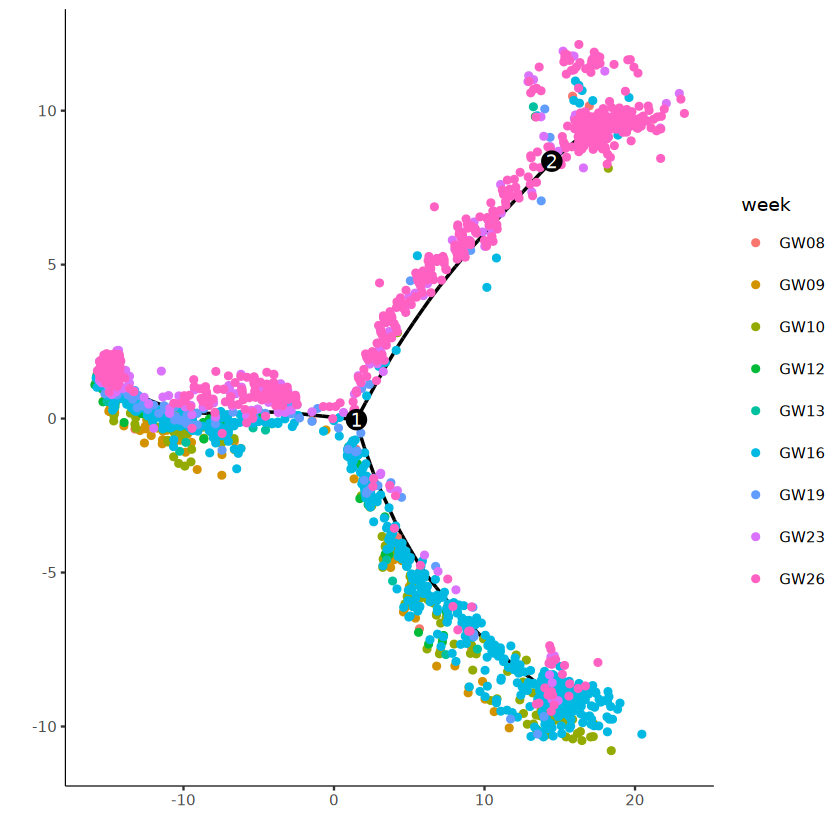

In [ ]:
plot_cell_trajectory(cds, color_by = "week") + xlab('')+ylab('')+theme(legend.position = 'right')

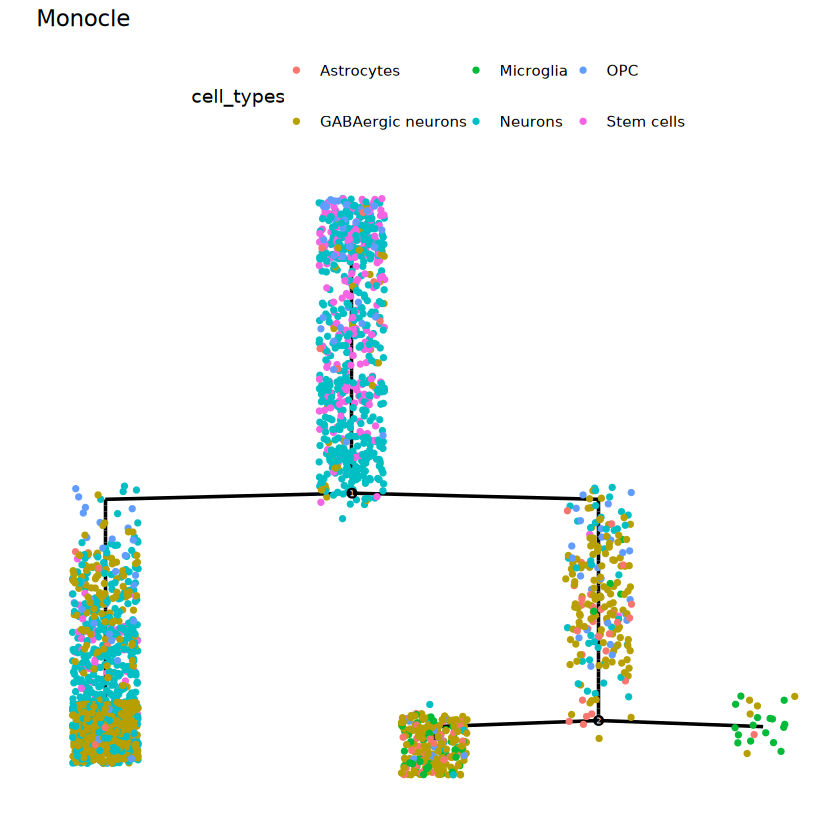

In [57]:
plot_complex_cell_trajectory(cds, color_by = "cell_types",cell_size = 1)+ggtitle('Monocle')

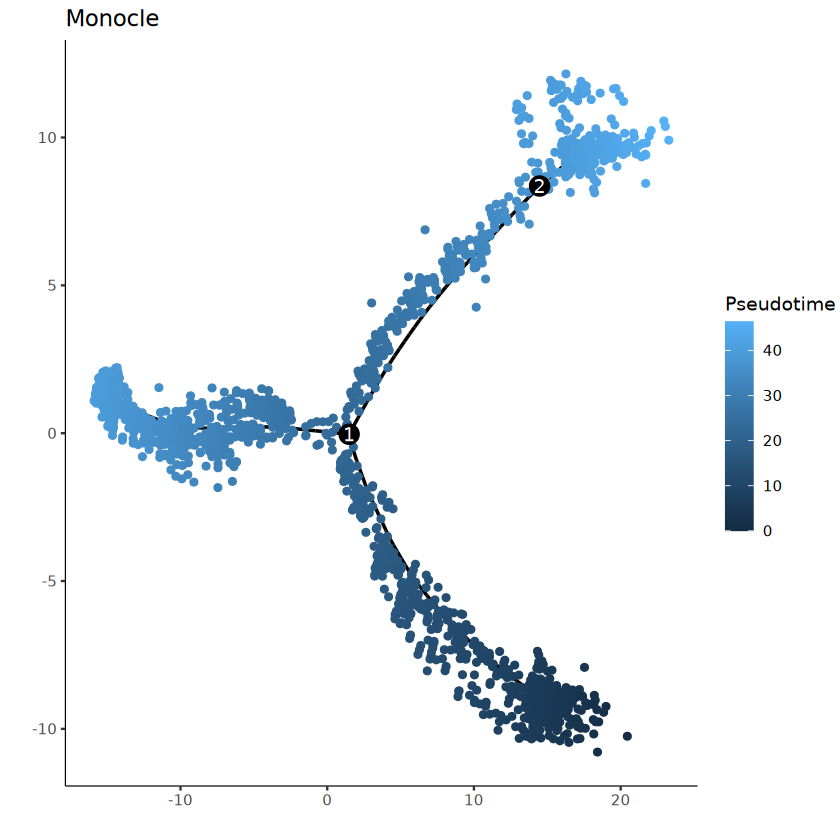

In [ ]:
plot_cell_trajectory(cds, color_by = "Pseudotime")+ggtitle('Monocle')+theme(legend.position = 'right')+xlab('')+ylab('')


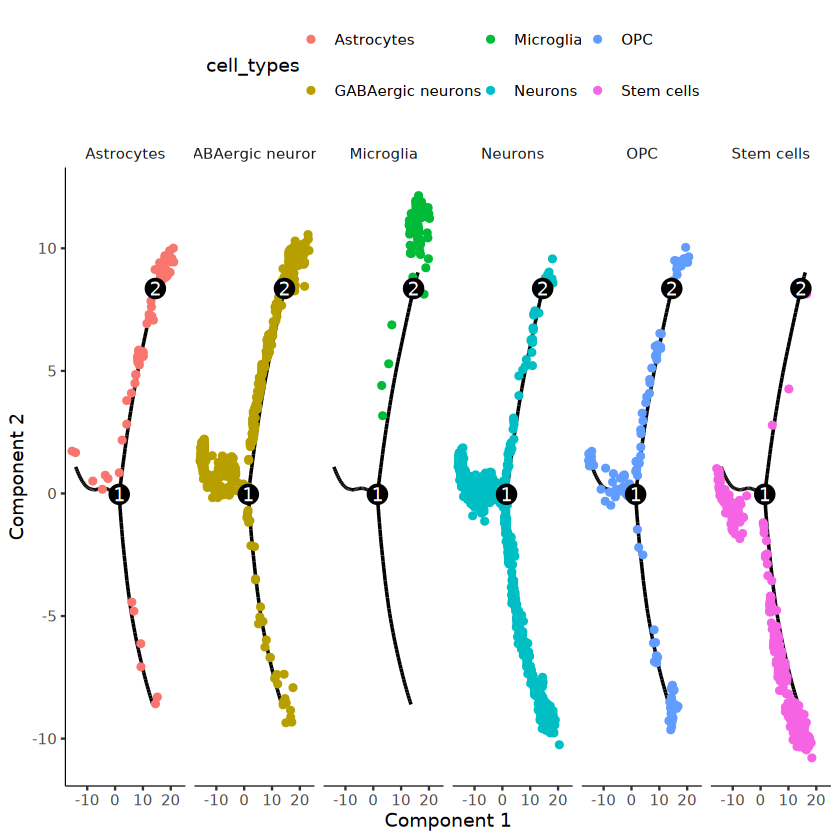

In [31]:
plot_cell_trajectory(cds, color_by = "cell_types") +
  facet_wrap("~cell_types", nrow = 1)